# Clasificación



Los problemas de clasificación buscan predecir las categorías a las que pertenecen las variables dependientes. Por ejemplo, saber si un cliente será moroso, si un paciente tiene cierta enfermedad, etc. son problemas de clasificación. 

Los resultados de los modelos de clasificación pueden ser las clases asignadas o probabilidades de pertenencia a cierta clase.

## Clasificadores lineales

Como ejemplo, empecemos con un método de clasificación lineal basado en funciones discriminantes. Este modelo busca asignar $K = \{1, 2, ..., k\}$ clases mediante la función de ajuste 

$$\hat{f}_k(x) = \beta_{k,0} + \beta_k x.$$ 

Para cada par de clases $i, j$, existen cotas tales que $\hat{f}_i(x) = \hat{f}_j(x)$. De esta manera, el espacio de solución se divide en hiperplanos que corresponden con regiones donde clasificar las variables.

Otro tipo de modelos lineales de clasificación que entran dentro de las funciones discriminantes, son las que parten de distribuciones de probabilidad _a posteriori_ del tipo 

$$P(G = k | X = x),$$ 

donde $G$ es el predictor que se espera sea asignado a la clase $k$ a partir de que la información observada $X$ para las variables dependientes $x$.

Cabe señalar que, pese a que las cotas obtenidas de las funciones de ajuste $\hat{f}_k(x)$ resulten lineales, es posible generalizarlas mediante el uso de transformaciones de las variables $p-\text{dimensionales}$ $X_i, i \in {1, \ldots, p}$ para expandir el número de variables (con base en la transformación aplicada sobre las varaibles). Estas transformaciones generalmente asignan vectores de valores $C$ y pesos $W$ a las características $q$ (o datos de entrada), que se traducen en multiplicaciones matriciales $C_q \times W_q$.

## Clasificador de Bayes ingenuo

El clasificador de Bayes ingenuo (o *Naive Bayes*) se puede entender desde la premisa de un clasificador bayesiando exacto, en el que 
1. se toman vectores de variables independiente $X$ que tengan la misma salida $Y$,
2. se determina la clase predominante del conjunto, y
3. se utiliza esta información para asignar el valor de la clase más frecuente a nuevos elementos.

Esta solución podría estar sesgada a las características de los conjuntos. Para paliar dicho sesgo, *Naive Bayes* sigue estas modificaciones:
- Se usan todo el conjunto de datos.
- Para cada respuesta $Y = {1, \ldots, k}$, se estima la probabilidad condicional del predictor $P(X_j | Y = i)$
- Se realiza la probabilidad condicional 

$$P(Y = i | X_1, \ldots, X_j) = \frac{P(Y = i) \cdot P(X_1 | Y = i) \ldots P(X_j | Y = i)}{\sum_i P(Y = i) P(X_1, \ldots, X_j)}.$$

- Se asume que las $X$ son independientes entre sí (al obtener la probabilidad de interacción con $Y$ de cada una de ellas).

## Análisis lineal de discriminantes

Este análisis (LDA en inglés, por *linear discriminant analysis*), parte de la covarianza entre $n$ datos $x_i, z_i; i \in {1, \ldots, n}$ dada por $$s_{x, z} = \frac{\sum_i^n (x_i - \bar{x}) (z_i - \bar{z})}{n - 1},$$ para calcular la matriz de covarianza 

$$\Sigma = \begin{bmatrix}
s_x^2 & s_{x, z} \\ 
s_{z, x} & s_z^2
\end{bmatrix}$$

que incluye las varianzas individuales $s_x^2, s_z^2$ y sus covarianzas $s_{, z}, s_{z, x}$.

LDA se enfoca en maximizar la separación entre las medias de las clases $(\bar{x} - \bar{z})^2$ y minimizar la similitud entre miembros de una misma clase, o sea $s_x^2 + s_z^2$, de modo que la función objetivo sería 

$$\max \frac{(\bar{x} - \bar{z})^2}{s_x^2 + s_z^2}.$$

Para el caso generalizado de $p$ dimensiones con $X_i, i \in {1, \ldots, p}$, se toma como punto de referencia el centro $C$ de los datos dado por la media ponderada de todos los datos. Para cada $X_i$ se mide la distancia $d_i = (\bar{X_i} - C)^2$, para obtener una función objetivo 

$$\max \sum_i \frac{(\bar{X_i} - C)^2}{s_{X_i}^2}.$$

## Árboles de decisión

En general, los árboles de decisión clasifican datos $X$ a partir de su separación en $n$ regiones $R$ y obtienen una clasificación $Y$ a partir de las cotas que limitan las regiones. Una vez obtenidas dichas regiones, la función de predicción 

$$f(X) = \sum_m^n c_m ~ (X_i, X_j) \in R_m.$$

Específicamente, en el modelo de clasificación de árboles de decisión, se utiliza una proporción de observaciones 

$$p_{mk} = \frac{1}{N_m} \sum_{x_i \in R_m} I(y_i = k),$$

donde $N_m$ es la cantidad de observaciones y $k \in K$ clases. Después, se clasifican las observaciones $m$ en la clase $k$ mediante la maximización de esa proporción, es decir $$k(m) = \arg \max x_k p_{mk}.$$ Finalmente, se tienen medidas acerca de la impureza de los nodos, como por ejemplo el índice Gini que mide la probabilidad de que una observación $m$ pertenezca a una clase $k$ respecto a que no pertenezca ($k'$) a dicha clase, dada por la ecuación 

$$\sum_{k \neq k'} p_{mk} p_{mk'} = \sum_{k = 1}^K p_{mk}(1 - p_{mk}).$$ 

Para darle un poco de claridad, para una clase, esto puede escribirse como 

$$1 - (p_{mk})^2 - (p_{mk'})^2.$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    'Tiene_Casa': [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
    'Edad': [25, 45, 35, 50, 23, 40, 30, 33, 28, 47, 38, 52, 24, 43, 31, 36],
    'Salario': [50000, 100000, 70000, 120000, 45000, 95000, 60000, 75000, 52000, 110000, 68000, 125000, 48000, 98000, 62000, 70000],
    'Comprará': [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
df

,Tiene_Casa,Edad,Salario,Comprará
0,0,25,50000,1
1,1,45,100000,1
2,0,35,70000,0
3,1,50,120000,1
4,0,23,45000,0
5,1,40,95000,0
6,1,30,60000,1
7,0,33,75000,1
8,0,28,52000,0
9,1,47,110000,0


In [3]:
# Normalización
df['Edad'] = (df['Edad'] - df['Edad'].mean()) / df['Edad'].std()
df['Salario'] = (df['Salario'] - df['Salario'].mean()) / df['Salario'].std()
df

,Tiene_Casa,Edad,Salario,Comprará
0,0,-1.212649,-1.061541,1
1,1,0.943171,0.834068,1
2,0,-0.134739,-0.303297,0
3,1,1.482126,1.592311,1
4,0,-1.428231,-1.251101,0
5,1,0.404216,0.644507,0
6,1,-0.673694,-0.682419,1
7,0,-0.350321,-0.113736,1
8,0,-0.889276,-0.985716,0
9,1,1.158753,1.213189,0


### Algoritmo

- Por cada característica
- Si es binaria
- Conteo de frecuencias

In [6]:
df_tiene_casa = df[['Tiene_Casa', 'Comprará']]
df_tiene_casa

,Tiene_Casa,Comprará
0,0,1
1,1,1
2,0,0
3,1,1
4,0,0
5,1,0
6,1,1
7,0,1
8,0,0
9,1,0


In [7]:
arbol_tiene_casa = {
    'sí' : {
        'comprará' : 0,
        'no_comprará' : 0
    },
    'no' : {
        'comprará' : 0,
        'no_comprará' : 0
    },
}

In [8]:
for i, r in df_tiene_casa.iterrows():
    if r.loc['Tiene_Casa']:
        if r.loc['Comprará']:
            arbol_tiene_casa['sí']['comprará'] += 1
        else:
            arbol_tiene_casa['sí']['no_comprará'] += 1
    else:
        if r.loc['Comprará']:
            arbol_tiene_casa['no']['comprará'] += 1
        else:
            arbol_tiene_casa['no']['no_comprará'] += 1
arbol_tiene_casa

{'sí': {'comprará': 5, 'no_comprará': 2},
 'no': {'comprará': 4, 'no_comprará': 5}}

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

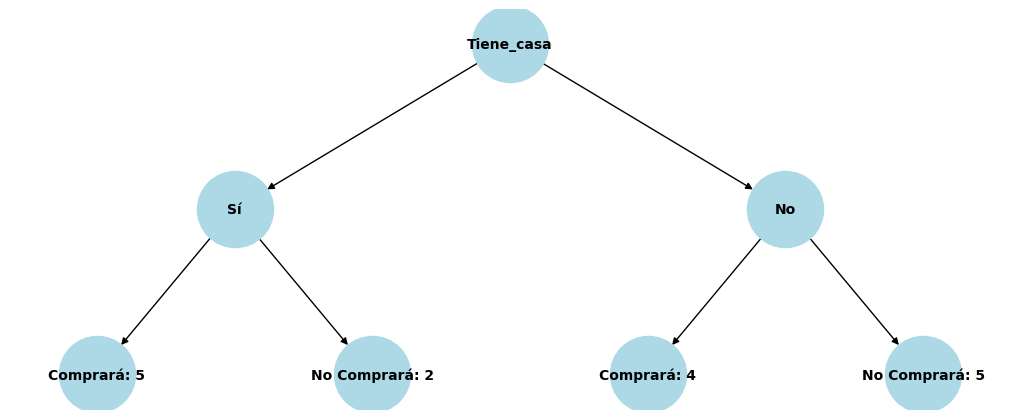

In [18]:
# Crear un nuevo grafo
G = nx.DiGraph()

# Añadir nodos y bordes al grafo según el diccionario
G.add_node('Raíz')
G.add_node('Sí')
G.add_node('No')
G.add_node('Sí_Comprará')
G.add_node('Sí_No_Comprará')
G.add_node('No_Comprará')
G.add_node('No_No_Comprará')

G.add_edges_from([
    ('Raíz', 'Sí'),
    ('Raíz', 'No'),
    ('Sí', 'Sí_Comprará'),
    ('Sí', 'Sí_No_Comprará'),
    ('No', 'No_Comprará'),
    ('No', 'No_No_Comprará')
])

# Etiquetas de los nodos
labels = {
    'Raíz': 'Tiene_casa',
    'Sí': 'Sí',
    'No': 'No',
    'Sí_Comprará': 'Comprará: 5',
    'Sí_No_Comprará': 'No Comprará: 2',
    'No_Comprará': 'Comprará: 4',
    'No_No_Comprará': 'No Comprará: 5'
}

# Posición de los nodos
pos = {
    'Raíz': (0.5, 1.0),
    'Sí': (0.3, 0.9),
    'No': (0.7, 0.9),
    'Sí_Comprará': (0.2, 0.8),
    'Sí_No_Comprará': (0.4, 0.8),
    'No_Comprará': (0.6, 0.8),
    'No_No_Comprará': (0.8, 0.8)
}

# Dibujar el grafo
plt.figure(figsize=(10, 4))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# Mostrar el gráfico
plt.show()

In [20]:
arbol_tiene_casa

{'sí': {'comprará': 5, 'no_comprará': 2},
 'no': {'comprará': 4, 'no_comprará': 5}}

In [21]:
# Impureza de Gini para cada hoja
# Calcular la suma de los valores de cada subdiccionario y guardarla en 'gini'
for key in arbol_tiene_casa:
    arbol_tiene_casa[key]['suma'] = arbol_tiene_casa[key]['comprará'] + arbol_tiene_casa[key]['no_comprará']
    arbol_tiene_casa[key]['gini'] = 1 - (1 / arbol_tiene_casa[key]['comprará']) ** 2 - (1 / arbol_tiene_casa[key]['no_comprará']) ** 2
    arbol_tiene_casa[key]['gini'] = round(arbol_tiene_casa[key]['gini'], 4)
arbol_tiene_casa

{'sí': {'comprará': 5, 'no_comprará': 2, 'suma': 7, 'gini': 0.71},
 'no': {'comprará': 4, 'no_comprará': 5, 'suma': 9, 'gini': 0.8975}}

In [23]:
# Impureza de Gini para la rama
arbol_tiene_casa['gini'] = 0
arbol_tiene_casa['suma'] = arbol_tiene_casa['sí']['suma'] + arbol_tiene_casa['no']['suma']
arbol_tiene_casa

{'sí': {'comprará': 5, 'no_comprará': 2, 'suma': 7, 'gini': 0.71},
 'no': {'comprará': 4, 'no_comprará': 5, 'suma': 9, 'gini': 0.8975},
 'gini': 0,
 'suma': 16}

In [24]:
for key in arbol_tiene_casa:
    if key in ['sí', 'no']:
        arbol_tiene_casa['gini'] += arbol_tiene_casa[key]['suma'] / arbol_tiene_casa['suma'] * arbol_tiene_casa[key]['gini']
arbol_tiene_casa

{'sí': {'comprará': 5, 'no_comprará': 2, 'suma': 7, 'gini': 0.71},
 'no': {'comprará': 4, 'no_comprará': 5, 'suma': 9, 'gini': 0.8975},
 'gini': 0.81546875,
 'suma': 16}

## Bosques aleatorios

- Un bosque aleatorio es una colección de árboles de decisión donde cada árbol es entrenado en una muestra aleatoria del conjunto de datos.
- Los bosques aleatorios utilizan el bagging (Bootstrap Aggregating) y la aleatorización de características para crear cada árbol.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [27]:
# Carga de datos
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [28]:
# Entrenamiento y prueba
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
# Declaración del modelo
clf = RandomForestClassifier(
    n_estimators = 100, # Árboles en el bosque
    # max_depth: Profundidad máxima de los árboles.
    # min_samples_split: Número mínimo de muestras requeridas para dividir un nodo.
    # min_samples_leaf: Número mínimo de muestras requeridas para estar en una hoja.
    )
clf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 12  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Importancia de la característica de Gini
Esto de la importancia tiene que ver con la impureza de Gini, que facilita lo siguiente:

- Interpretabilidad: Destaca características relevantes.
- Selección de Características: Permite eliminar características menos importantes.
- Diagnóstico: Suelen resaltar características redundantes o irrelevantes.

In [32]:
feature_importances = clf.feature_importances_
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

print(importances)

             Feature  Importance
2  petal length (cm)    0.497523
3   petal width (cm)    0.407944
0  sepal length (cm)    0.062932
1   sepal width (cm)    0.031601


### Interpretación de la importancia

- Importancia relativa: 
    - Más importante -> Más contribución en las decisiones del modelo
    - Importancia 0 -> Influencia mínima
    - Características altamente correlacionadas pueden compartir importancia.
- Recomendación: 
    - Las características más importantes pueden ser investigadas más a fondo.
    - Características menos importantes pueden ser eliminadas en futuros modelos para simplificar (quizás mejorar el rendimiento).

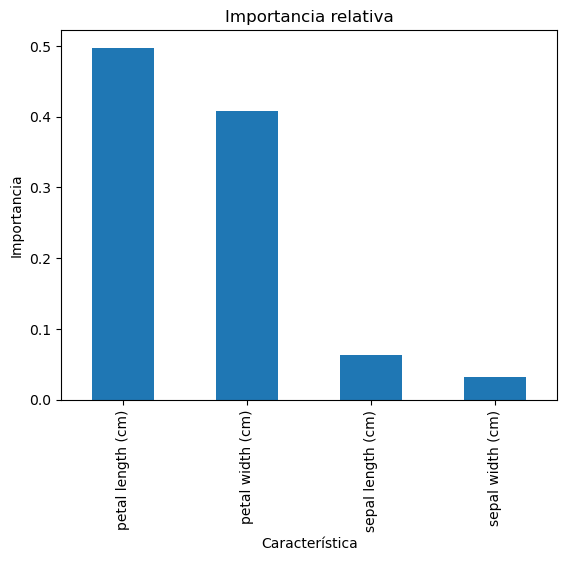

In [33]:
importances.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Importancia relativa')
plt.ylabel('Importancia')
plt.xlabel('Característica')
plt.show()

In [34]:
# Optimización exprés de hiperparámetros
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator = clf, 
    param_grid = param_grid, 
    cv = 3, 
    n_jobs = -1
)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [41]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131570,0.012525,0.009224,0.002072,NaN,1,2,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.971429,0.914286,0.942857,0.942857,0.023328,7
1,0.216741,0.008529,0.009735,0.001665,NaN,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.971429,0.914286,0.942857,0.942857,0.023328,7
2,0.430573,0.020159,0.016748,0.003120,NaN,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.971429,0.914286,0.942857,0.942857,0.023328,7
3,0.109392,0.015431,0.006530,0.002137,NaN,1,5,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.971429,0.914286,0.942857,0.942857,0.023328,7
4,0.208331,0.006164,0.009856,0.001939,NaN,1,5,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.971429,0.914286,0.942857,0.942857,0.023328,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.114201,0.009878,0.004356,0.000841,30.0,4,5,100,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.971429,0.914286,0.942857,0.942857,0.023328,7
104,0.253900,0.006222,0.007196,0.000845,30.0,4,5,200,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.971429,0.914286,0.942857,0.942857,0.023328,7
105,0.052544,0.002423,0.004361,0.000900,30.0,4,10,50,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.971429,0.914286,0.942857,0.942857,0.023328,7
106,0.106228,0.007210,0.005051,0.001217,30.0,4,10,100,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.971429,0.914286,0.942857,0.942857,0.023328,7


## Tarea 7 (10 puntos)

- Generar la parte de metodología del artículo, explicando los métodos usados con base en la literatura que los sustenta.